In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\fabio\Documents\Capítulo10\pima-data.csv', engine='python')

In [3]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [5]:
class_mapping = {True : 1, False : 0}

In [6]:
df['diabetes'] = df['diabetes'].map(class_mapping)
data = df.drop(['skin'], axis=1)

In [7]:
data_points, data_labels = data.iloc[:, :-1].values, df[['diabetes']].values

In [8]:
#Split the Dataset in a train set and a test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_points, data_labels, test_size=0.30, random_state=0)

In [9]:
#Standardize the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [10]:
#Fit the model with Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(C=1.0, penalty='l1', random_state=0)
model.fit(x_train_std, y_train.ravel())
y_pred = model.predict(x_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

Accuracy: 0.78


In [11]:
def cross_val(model, folds, n=1):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(estimator=model, 
                        X=x_train_std,
                        y=y_train.ravel(),
                        cv=folds,
                        n_jobs=n)
    print('Cross Val accuracy scores: %s' % scores)

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, C=3.0)
svm.fit(x_train_std, y_train.ravel())
y_pred_svm = svm.predict(x_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

Accuracy: 0.78


In [13]:
cross_val(svm, folds=5, n=4 )

Cross Val accuracy scores: [0.7037037  0.7962963  0.74074074 0.69158879 0.75471698]


In [14]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(x_train_std, y_train.ravel())
y_pred_NB = model_NB.predict(x_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

Accuracy: 0.78


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train.ravel())
y_pred = rf.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy: 0.75


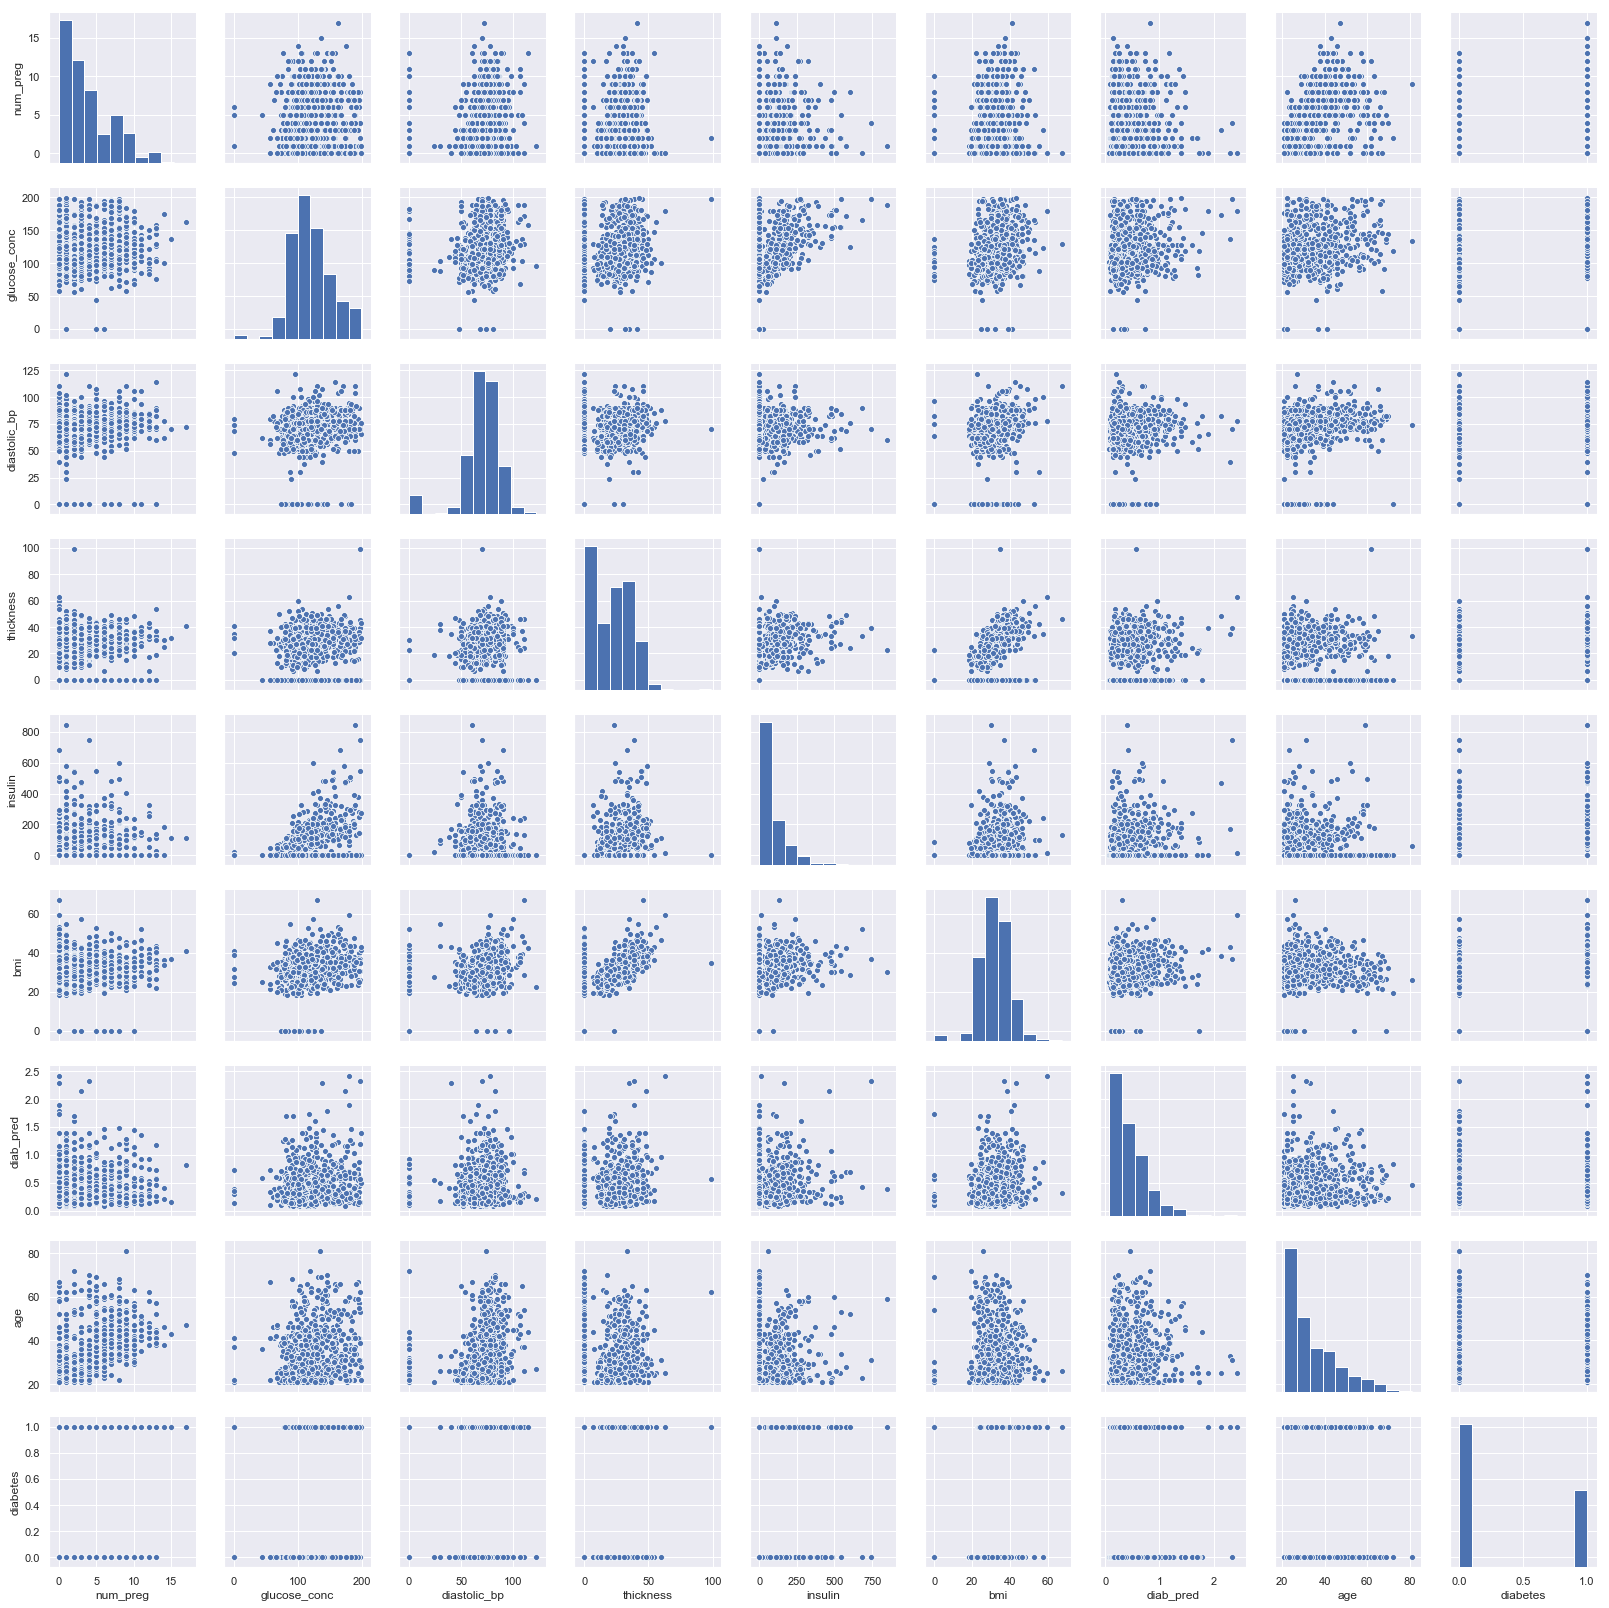

In [28]:
import seaborn as sns
sns.pairplot(data)

In [26]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize' : (6, 4)})

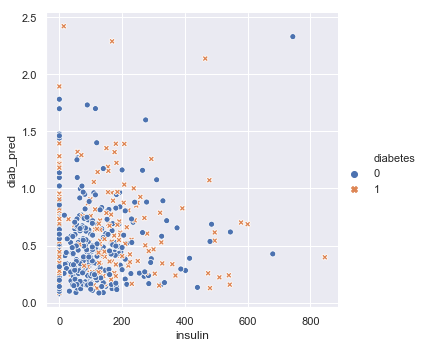

In [29]:
sns.relplot(x='insulin', y='diab_pred', hue='diabetes', style='diabetes', data=data)

C:\Users\fabio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


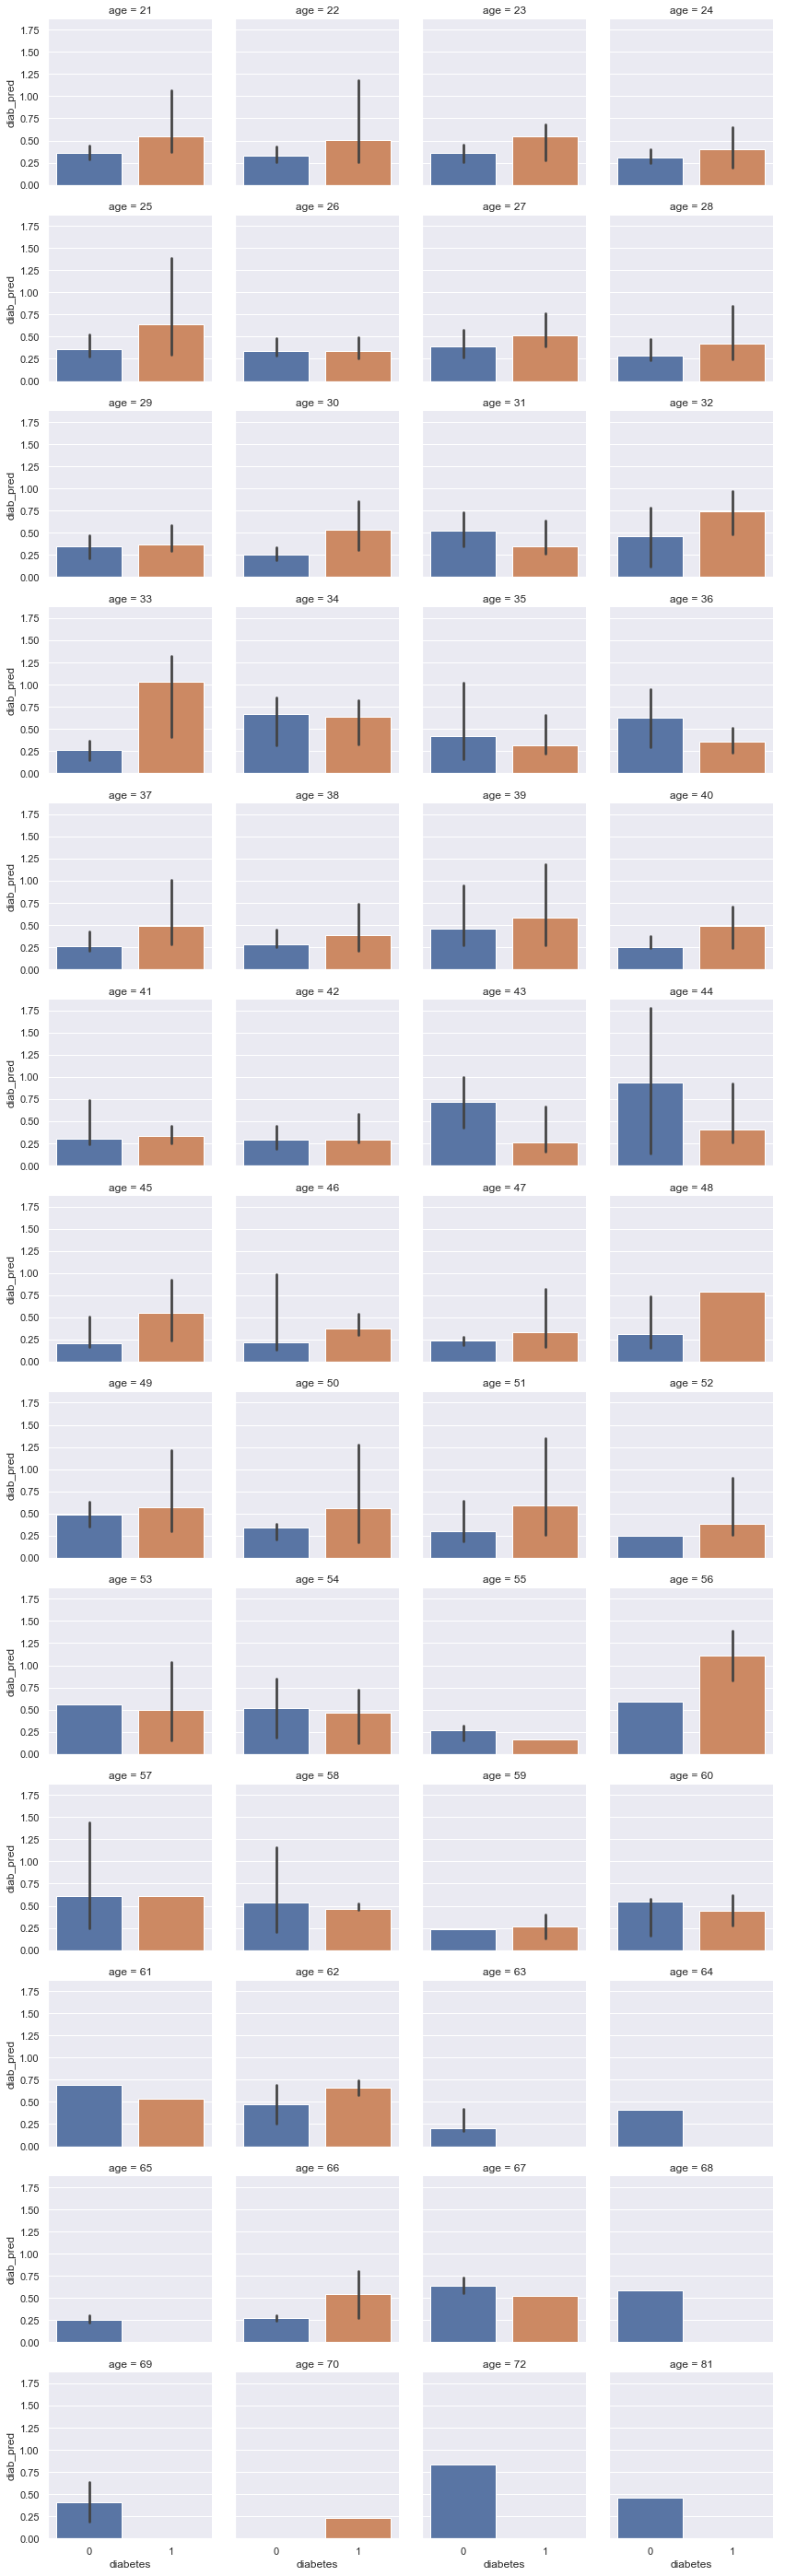

In [34]:
from numpy import median
sns.catplot(x='diabetes', y='diab_pred', col='age', height=3, estimator=median, data=data, col_wrap=4, kind='bar')